# First exercise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
import seaborn as sns

## Download dataset

In [2]:
#!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

## Main codes

In [3]:
df = pd.read_csv("FuelConsumption.csv")

In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


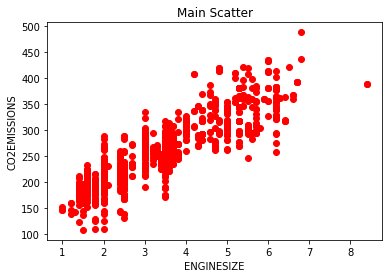

In [5]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = "red")
plt.title("Main Scatter")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

## Creating train and test models

In [6]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## Train data

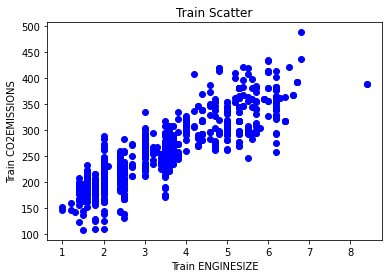

In [7]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = "blue")
plt.title("Train Scatter")
plt.xlabel("Train ENGINESIZE")
plt.ylabel("Train CO2EMISSIONS")
plt.show()

## Regression starting

In [8]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
print ('Coefficients: ', regr.coef_)
print("Intercept : ", regr.intercept_)

Coefficients:  [[38.89446149]]
Intercept :  [125.43833346]


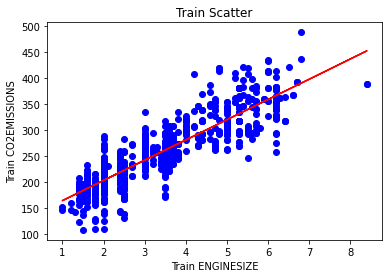

In [10]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = "blue")
plt.plot(train_x, regr.coef_ * train_x + regr.intercept_, "r")
plt.title("Train Scatter")
plt.xlabel("Train ENGINESIZE")
plt.ylabel("Train CO2EMISSIONS")
plt.show()

In [11]:
x = float(input("Enter the engine size :" ))
predict = regr.intercept_ + regr.coef_ * x
print(predict)

Enter the engine size :2
[[203.22725644]]


## testing the result

In [12]:
test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
test_predict = regr.predict(test_x)

print(r2_score(test_y, test_predict))

0.7778730430658412


In [13]:
# a = df.corr()
# a.shape

In [14]:
# plt.figure(figsize=(18,18))
# sns.heatmap(a, cbar = True, square = True, annot = True, annot_kws = {"size":15}, cmap="Greens" )

## from sklearn.model_selection import train_test_split

## x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3 # 30 %)